In [82]:
import pandas as pd
print ("Muhamad Wino Jati Pinulung_202331205_UTS")

Muhamad Wino Jati Pinulung_202331205_UTS


In [37]:
# Load datasets
df_regression = pd.read_csv("R02_rice_field.csv")
df_classification = pd.read_csv("K04_bank_customers.csv")

In [40]:
# Display first few rows of each dataset
print("Regression Dataset (R02_rice_field.csv):")
display(df_regression.head())

print("\nClassification Dataset (K04_bank_customers.csv):")
display(df_classification.head())

Regression Dataset (R02_rice_field.csv):


,Production (X),Harvest Area (Y)
0,1329536.0,323589.0
1,1299699.0,329041.0
2,1382905.0,339253.0
3,1419128.0,348223.0
4,1368074.0,337561.0



Classification Dataset (K04_bank_customers.csv):


,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [41]:
# Load the classification dataset with correct separator
df_classification = pd.read_csv("K04_bank_customers.csv", sep=";")

In [42]:
# Display the first few rows to confirm the format
print("Corrected Classification Dataset (K04_bank_customers.csv):")
display(df_classification.head())

Corrected Classification Dataset (K04_bank_customers.csv):


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
# Check for missing values in both datasets
print("Missing values in Regression Dataset (R02_rice_field.csv):")
print(df_regression.isnull().sum())

Missing values in Regression Dataset (R02_rice_field.csv):
Production (X)      0
Harvest Area (Y)    0
dtype: int64


In [44]:
print("\nMissing values in Classification Dataset (K04_bank_customers.csv):")
print(df_classification.isnull().sum())


Missing values in Classification Dataset (K04_bank_customers.csv):
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [46]:
# Import library yang dibutuhkan
from sklearn.preprocessing import LabelEncoder


In [47]:
# Kolom-kolom kategori yang perlu dikonversi menjadi numerik pada dataset klasifikasi
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

In [48]:
# Dictionary untuk menyimpan encoder setiap kolom (jika nanti diperlukan untuk konversi balik)
label_encoders = {}

In [49]:
# Mengonversi setiap kolom kategori ke bentuk numerik
for column in categorical_columns:
    le = LabelEncoder()  # Inisialisasi LabelEncoder
    df_classification[column] = le.fit_transform(df_classification[column])  # Lakukan encoding
    label_encoders[column] = le  # Simpan encoder dalam dictionary

In [50]:
# Tampilkan beberapa baris pertama dari dataset klasifikasi yang sudah di-encode
print("Dataset Klasifikasi yang Sudah Dikonversi (K04_bank_customers.csv):")
display(df_classification.head())

Dataset Klasifikasi yang Sudah Dikonversi (K04_bank_customers.csv):


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [51]:
# Pisahkan fitur dan target untuk dataset regresi
X_regression = df_regression[['Production (X)']]  # Fitur
y_regression = df_regression['Harvest Area (Y)']  # Target

In [52]:
# Pisahkan fitur dan target untuk dataset klasifikasi
X_classification = df_classification.drop(columns=['y'])  # Fitur
y_classification = df_classification['y']  # Target

In [53]:
# Tampilkan beberapa baris pertama dari masing-masing fitur dan target untuk verifikasi
print("Fitur dan Target pada Dataset Regresi:")
display(X_regression.head(), y_regression.head())

print("\nFitur dan Target pada Dataset Klasifikasi:")
display(X_classification.head(), y_classification.head())

Fitur dan Target pada Dataset Regresi:


,Production (X)
0,1329536.0
1,1299699.0
2,1382905.0
3,1419128.0
4,1368074.0


0    323589.0
1    329041.0
2    339253.0
3    348223.0
4    337561.0
Name: Harvest Area (Y), dtype: float64


Fitur dan Target pada Dataset Klasifikasi:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [54]:
# Import library untuk membagi dataset
from sklearn.model_selection import train_test_split


In [55]:
# Pembagian data pada dataset regresi
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)


In [56]:
# Pembagian data pada dataset klasifikasi
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)


In [57]:
# Tampilkan ukuran masing-masing set untuk verifikasi
print("Ukuran Dataset Regresi - Train:", X_train_reg.shape, "| Test:", X_test_reg.shape)
print("Ukuran Dataset Klasifikasi - Train:", X_train_clf.shape, "| Test:", X_test_clf.shape)

Ukuran Dataset Regresi - Train: (179, 1) | Test: (45, 1)
Ukuran Dataset Klasifikasi - Train: (36168, 16) | Test: (9043, 16)


In [58]:
# Import library SVM untuk regresi
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [59]:
# Inisialisasi model SVR dan latih model pada data latih
svr_model = SVR()
svr_model.fit(X_train_reg, y_train_reg)

SVR()

In [60]:
# Prediksi pada data uji
y_pred_reg = svr_model.predict(X_test_reg)

In [61]:
# Evaluasi model regresi menggunakan Mean Squared Error (MSE)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error untuk Model Regresi SVM:", mse_reg)

Mean Squared Error untuk Model Regresi SVM: 41655346494.95118


In [62]:
# Import library SVM untuk klasifikasi
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [63]:
# Inisialisasi model SVC dan latih model pada data latih
svc_model = SVC()
svc_model.fit(X_train_clf, y_train_clf)

SVC()

In [64]:
# Prediksi pada data uji
y_pred_clf = svc_model.predict(X_test_clf)

In [65]:
# Evaluasi model klasifikasi menggunakan Akurasi
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print("Akurasi untuk Model Klasifikasi SVM:", accuracy_clf)

Akurasi untuk Model Klasifikasi SVM: 0.8794647793873714


In [76]:
import matplotlib.pyplot as plt

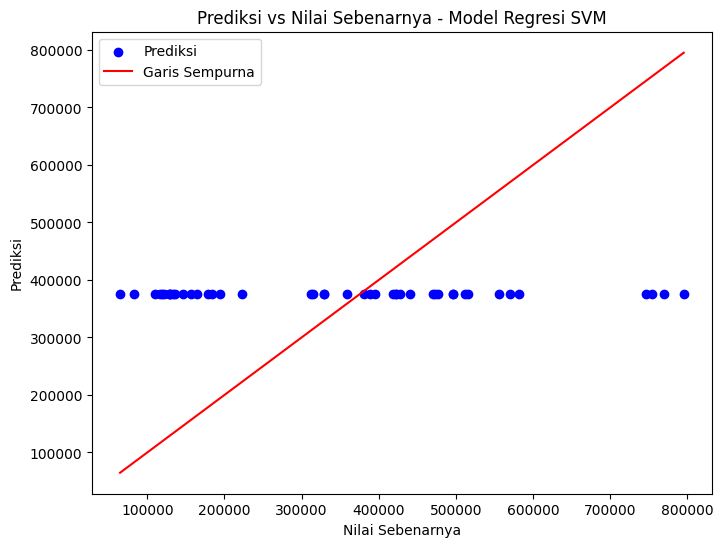

In [77]:
# Grafik Prediksi vs. Nilai Sebenarnya (Regresi)
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_reg, color='blue', label='Prediksi')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', label='Garis Sempurna')
plt.title('Prediksi vs Nilai Sebenarnya - Model Regresi SVM')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [79]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)

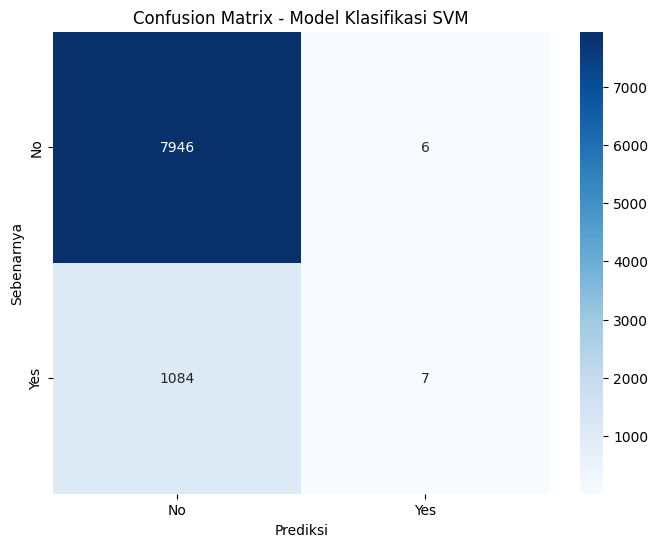

In [80]:
# Visualisasikan confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Model Klasifikasi SVM')
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.show()

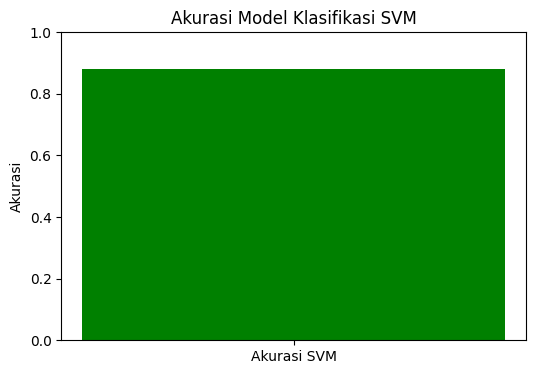

In [81]:
# Membuat grafik bar untuk akurasi klasifikasi
plt.figure(figsize=(6,4))
plt.bar(['Akurasi SVM'], [accuracy_clf], color='green')
plt.title('Akurasi Model Klasifikasi SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)  # Menetapkan batas y-axis antara 0 dan 1
plt.show()